In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_with_new_features.csv').drop_duplicates()

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ss the leaf,sector 85,1.20,12371.0,970.010508,Super Built up area 1671(155.24 sq.m.)Built Up...,2.0,2.0,2,4.0,East,Relatively New,1671.0,1190.0,970.0,0.0,1.0,1.0,0.0,0.0,1,81
1,flat,tulip purple,sector 69,1.80,9000.0,2000.000000,Super Built up area 2400(222.97 sq.m.)Built Up...,4.0,5.0,3+,4.0,North-East,Relatively New,2400.0,2200.0,2000.0,0.0,1.0,0.0,0.0,0.0,1,165
2,flat,umang monsoon breeze,sector 78,1.15,5284.0,2176.381529,Super Built up area 2176(202.16 sq.m.),3.0,3.0,3,9.0,NaN,Moderately Old,2176.0,NaN,NaN,0.0,1.0,0.0,0.0,1.0,1,22
3,house,independent,sector 7,2.25,16892.0,1332.000000,Built Up area: 148 (123.75 sq.m.),5.0,3.0,0,2.0,NaN,Undefined,NaN,148.0,NaN,0.0,0.0,0.0,0.0,0.0,1,0
4,flat,tulip violet,sector 69,1.75,9459.0,1850.089862,Carpet area: 1850 (171.87 sq.m.),3.0,4.0,2,0.0,East,Relatively New,NaN,NaN,1850.0,0.0,0.0,0.0,0.0,0.0,0,174


In [5]:
df.shape

(3678, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3678 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3677 non-null   object 
 1   society              3676 non-null   object 
 2   sector               3678 non-null   object 
 3   price                3661 non-null   float64
 4   price_per_sqft       3661 non-null   float64
 5   area                 3661 non-null   float64
 6   areaWithType         3677 non-null   object 
 7   bedRoom              3677 non-null   float64
 8   bathroom             3677 non-null   float64
 9   balcony              3677 non-null   object 
 10  floorNum             3658 non-null   float64
 11  facing               2632 non-null   object 
 12  agePossession        3678 non-null   object 
 13  super_built_up_area  1875 non-null   float64
 14  built_up_area        1691 non-null   float64
 15  carpet_area          1871 non-null   float6

/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_65830/444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])
/Users/ravina/Desktop/RealEstateProject/realestatevenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

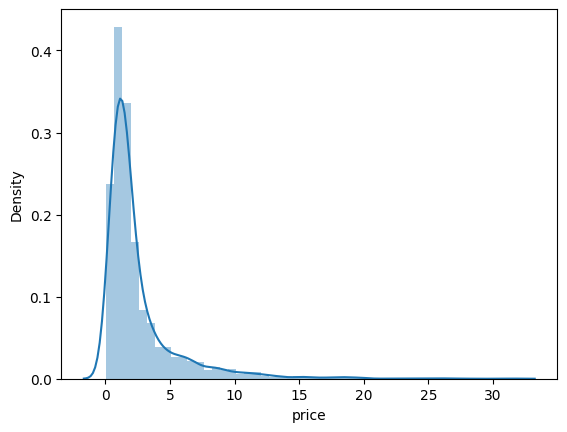

In [7]:
sns.distplot(df['price'])

<Axes: xlabel='price'>

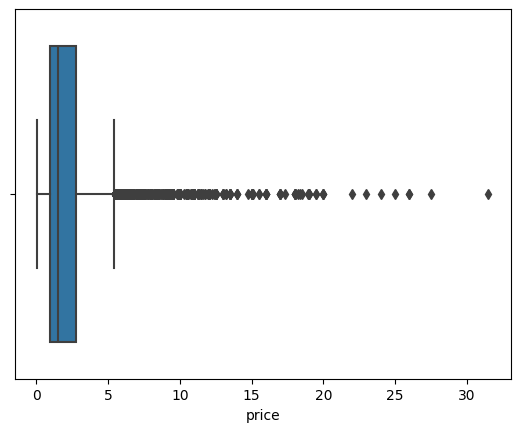

In [8]:
sns.boxplot(x=df['price'])

In [9]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [10]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2112,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7.0,9.0,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1.0,1.0,1.0,1.0,0.0,2,74
918,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1.0,1.0,0.0,1.0,1.0,0,42
1038,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16.0,16.0,3+,4.0,North-West,New Property,NaN,400.0,350.0,1.0,1.0,1.0,1.0,0.0,2,72
1995,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6.0,7.0,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1.0,1.0,0.0,1.0,1.0,0,138
965,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4.0,4.0,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1.0,1.0,1.0,1.0,0.0,1,0
3733,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5.0,5.0,2,1.0,North-East,Old Property,NaN,400.0,NaN,1.0,1.0,0.0,1.0,0.0,0,122
2060,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4.0,4.0,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1.0,1.0,1.0,1.0,0.0,0,145
122,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5.0,6.0,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0.0,1.0,0.0,0.0,0.0,1,54
509,house,independent,sector 26,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0.0,1.0,0.0,1.0,0.0,2,97
1602,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16.0,16.0,3+,4.0,NaN,New Property,NaN,500.0,NaN,0.0,1.0,0.0,0.0,0.0,0,31


In [11]:
# We observe that in the price col there are some genuine outliers but there are some data erros as well

### Price_per_sqft

/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_65830/2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])
/Users/ravina/Desktop/RealEstateProject/realestatevenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_per_sqft', ylabel='Density'>

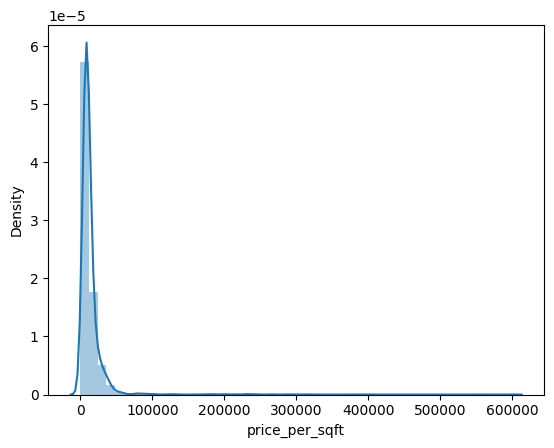

In [12]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

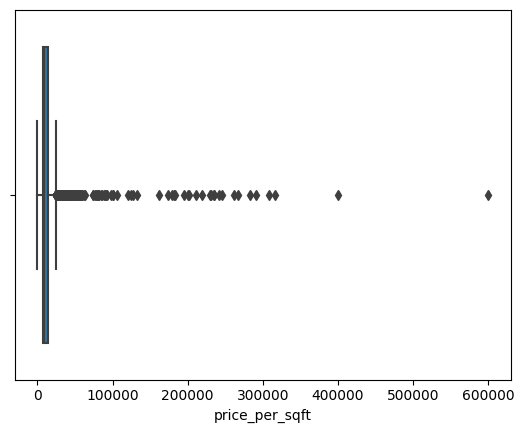

In [13]:
sns.boxplot(x=df['price_per_sqft'])

In [14]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [15]:
#some of the area entrieas are in yards instead of square feet which can  be resolved and reduce the outliers  
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x) 

/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_65830/4112049937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [16]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_65830/3686006548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [17]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.836158
std      12403.074329
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [18]:
df.update(outliers_sqft)

/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_65830/2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])
/Users/ravina/Desktop/RealEstateProject/realestatevenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_per_sqft', ylabel='Density'>

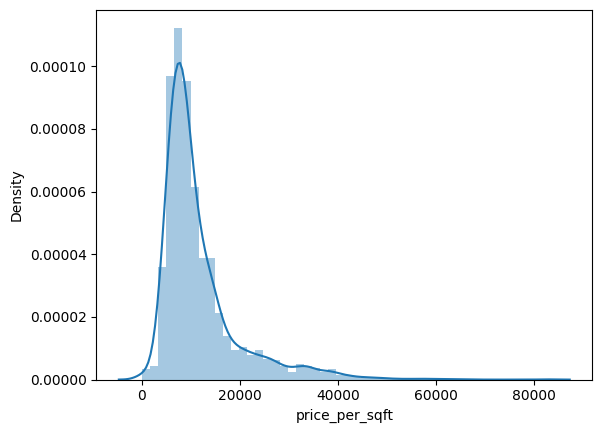

In [19]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

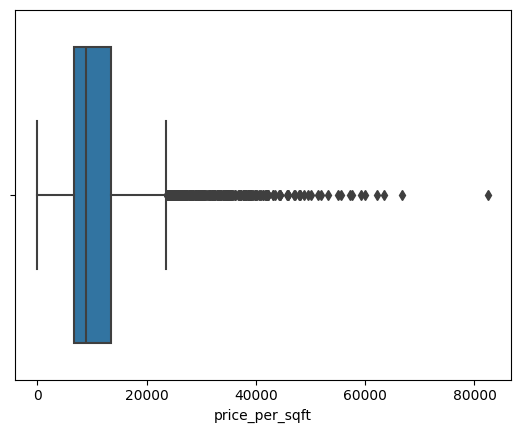

In [20]:
sns.boxplot(x=df['price_per_sqft'])

In [21]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
317,house,malibu towne,sector 47,8.50,53125.0,1600.000000,Built Up area: 1600 (148.64 sq.m.),12.0,12.0,3+,4.0,North,New Property,NaN,1600.0,NaN,0.0,0.0,0.0,0.0,0.0,0,99
474,flat,unitech vistas,sector 70,9.00,57507.0,1565.026866,Built Up area: 1565 (145.39 sq.m.),3.0,3.0,0,7.0,NaN,Undefined,NaN,1565.0,NaN,0.0,0.0,0.0,0.0,0.0,1,0
616,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.000000,Plot area 360(301.01 sq.m.),4.0,4.0,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,1.0,1.0,0.0,1.0,0.0,2,75
904,house,project housing board colony,sector 31,8.00,63492.0,1260.000000,Built Up area: 140 (117.06 sq.m.),2.0,1.0,0,1.0,NaN,Undefined,NaN,140.0,NaN,0.0,0.0,0.0,0.0,0.0,1,0
935,house,independent,sector 25,16.00,59259.0,2700.000000,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16.0,16.0,3+,4.0,West,New Property,NaN,325.0,300.0,1.0,1.0,1.0,1.0,0.0,2,72
1007,house,nul,sector 28,12.50,51440.0,2430.000000,Plot area 270(225.75 sq.m.),16.0,17.0,3+,4.0,South,Relatively New,NaN,2430.0,NaN,1.0,1.0,0.0,1.0,1.0,2,137
1038,house,independent,sector 26,26.00,82540.0,3150.000000,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16.0,16.0,3+,4.0,North-West,New Property,NaN,400.0,350.0,1.0,1.0,1.0,1.0,0.0,2,72
1435,house,independent,sector 26,14.75,51864.0,2844.000000,Plot area 316(264.22 sq.m.),16.0,20.0,3+,4.0,East,New Property,NaN,2844.0,NaN,1.0,1.0,1.0,1.0,0.0,0,153
1944,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.000000,Plot area 1000(92.9 sq.m.),3.0,3.0,0,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0.0,0.0,0.0,0.0,0.0,1,0
1995,house,dlf city plots,sector 26,26.00,57206.0,4545.000000,Plot area 505(422.24 sq.m.),6.0,7.0,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1.0,1.0,0.0,1.0,1.0,0,138


#property with pricepersqft>50000 are relatively quite big for residential purposes, therefore we are removing them from the dataframe

In [22]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

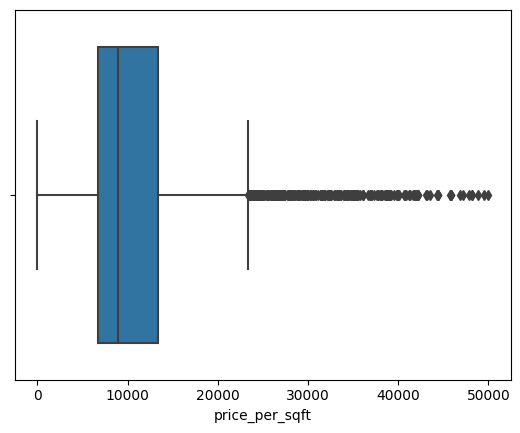

In [23]:
sns.boxplot(x=df['price_per_sqft'])

# Outliers in Area

/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_65830/91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])
/Users/ravina/Desktop/RealEstateProject/realestatevenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='area', ylabel='Density'>

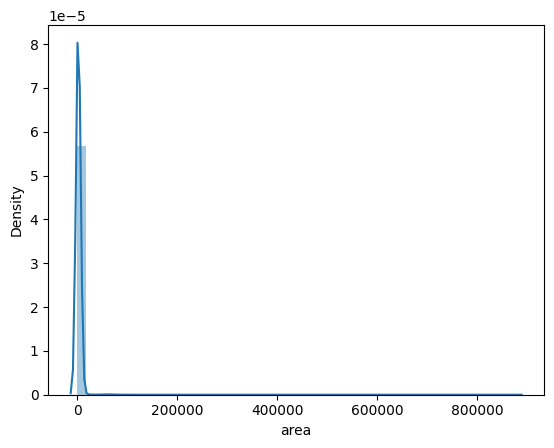

In [24]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

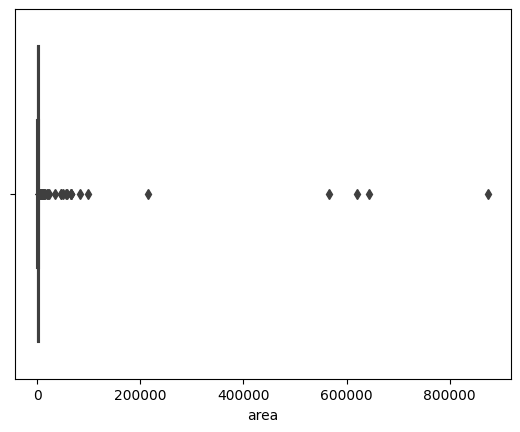

In [25]:
sns.boxplot(x=df['area'])

In [26]:
df['area'].describe()

count      3648.000000
mean       2947.745973
std       23205.009202
min         145.000000
25%        1262.020956
50%        1750.087504
75%        2350.067847
max      875000.000000
Name: area, dtype: float64

In [27]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2266,flat,signature the roselia,sector 95,0.45,7.0,642857.142857,Carpet area: 569243 (52884.41 sq.m.),2.0,2.0,2,2.0,South-West,New Property,NaN,NaN,569243.0,0.0,0.0,0.0,0.0,0.0,1,76
2857,flat,ramsons kshitij,sector 95,0.31,5.0,620000.000000,Carpet area: 607936 (56479.1 sq.m.),2.0,2.0,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1.0,0.0,0.0,0.0,1.0,1,65
2912,flat,hcbs sports ville,sohna road,0.35,4.0,875000.000000,Built Up area: 737147 (68483.2 sq.m.),2.0,2.0,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0.0,0.0,0.0,0.0,0.0,2,44
3395,house,independent,sector 50,5.00,232.0,215517.000000,Plot area 2(1011.71 sq.m.),6.0,5.0,3+,2.0,NaN,New Property,NaN,2.0,NaN,1.0,1.0,0.0,1.0,1.0,0,0
3651,flat,signature global solera 2,sector 107,0.51,9.0,566666.666667,Carpet area: 514396 (47788.95 sq.m.),2.0,2.0,1,3.0,North,New Property,NaN,NaN,514396.0,0.0,0.0,0.0,0.0,0.0,1,44


#Exclude the above entries

In [28]:
df = df[df['area'] < 100000]

/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_65830/91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])
/Users/ravina/Desktop/RealEstateProject/realestatevenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='area', ylabel='Density'>

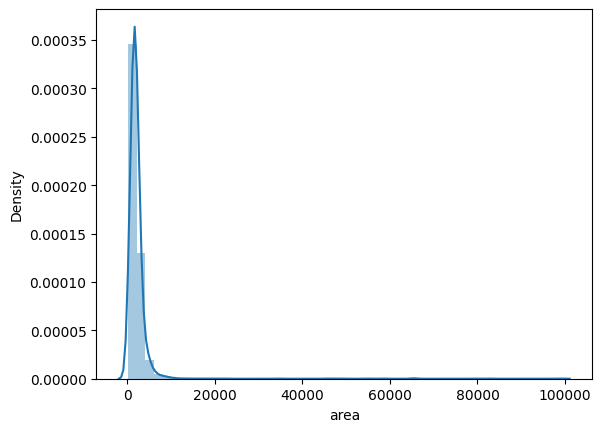

In [29]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

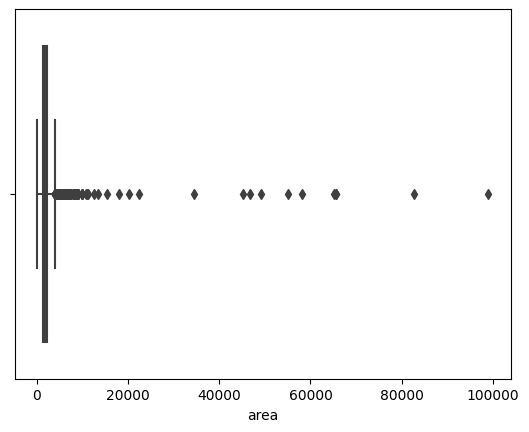

In [30]:
sns.boxplot(x=df['area'])

In [31]:
df = df[df['area'] < 12000]

In [32]:
df[df['area'] > 10000].sort_values('area',ascending=False)



,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
918,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1.0,1.0,0.0,1.0,1.0,0,42
25,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0.0,1.0,0.0,0.0,0.0,1,60
2717,house,independent,sohna road road,5.5,5093.0,10799.0,Plot area 1200(1003.35 sq.m.)Built Up area: 35...,3.0,3.0,3+,2.0,West,Moderately Old,NaN,3500.0,NaN,1.0,1.0,0.0,1.0,1.0,1,49


/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_65830/91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])
/Users/ravina/Desktop/RealEstateProject/realestatevenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='area', ylabel='Density'>

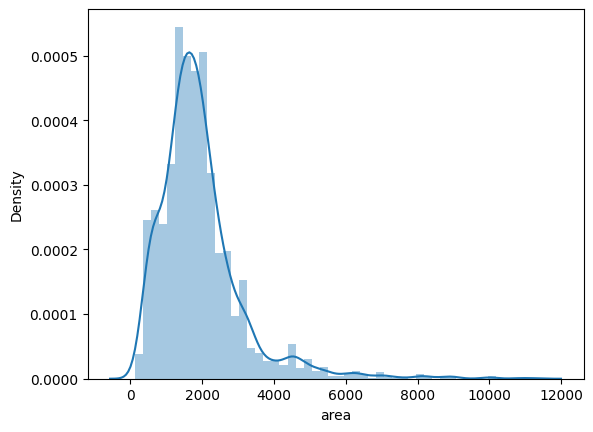

In [33]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

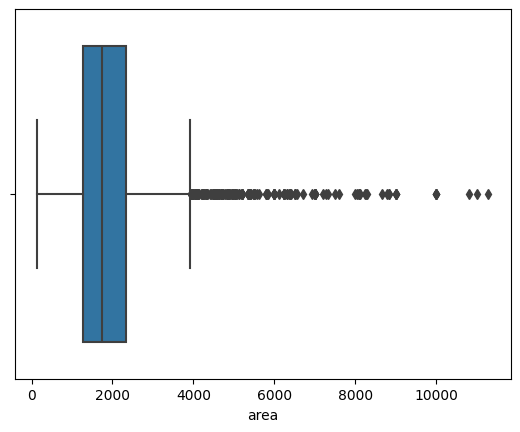

In [34]:
sns.boxplot(x=df['area'])

In [35]:
df['area'].describe()

count     3626.000000
mean      1948.134177
std       1211.780273
min        145.000000
25%       1260.274070
50%       1745.451175
75%       2324.990684
max      11286.000000
Name: area, dtype: float64

/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_65830/1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])
/Users/ravina/Desktop/RealEstateProject/realestatevenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bedRoom', ylabel='Density'>

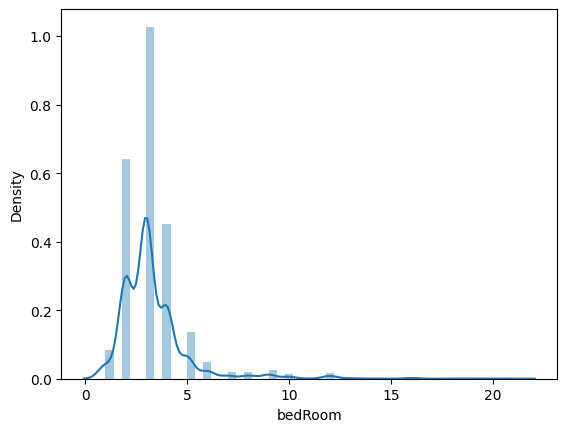

In [36]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

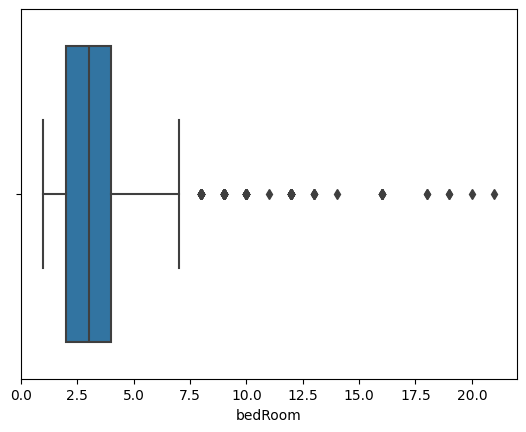

In [37]:
sns.boxplot(x=df['bedRoom'])

In [38]:
df['bedRoom'].describe()

count    3626.000000
mean        3.325703
std         1.818551
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [39]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1439,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21.0,21.0,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0.0,1.0,0.0,0.0,0.0,2,49
3640,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20.0,20.0,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0.0,1.0,0.0,0.0,0.0,2,22
2498,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19.0,17.0,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1.0,0.0,1.0,0.0,0.0,1,68
1134,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19.0,17.0,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1.0,1.0,1.0,1.0,0.0,1,74
2742,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18.0,18.0,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0.0,1.0,0.0,0.0,0.0,2,70
934,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18.0,18.0,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0.0,0.0,0.0,0.0,1.0,2,57
1906,house,independent,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16.0,18.0,2,4.0,West,New Property,NaN,2700.0,NaN,0.0,1.0,0.0,1.0,0.0,0,49
1602,house,luxury dlf city floors,sector 26,20.00,48888.0,4091.0,Plot area 500(418.06 sq.m.),16.0,16.0,3+,4.0,NaN,New Property,NaN,500.0,NaN,0.0,1.0,0.0,0.0,0.0,0,31
2718,house,independent,sector 56,12.39,45889.0,2700.0,Plot area 300(250.84 sq.m.),16.0,18.0,3+,4.0,North-East,New Property,NaN,2700.0,NaN,0.0,1.0,0.0,1.0,0.0,0,49
3015,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16.0,16.0,3+,4.0,NaN,New Property,NaN,3078.0,NaN,1.0,1.0,1.0,1.0,0.0,0,0


In [40]:
df = df[df['bedRoom'] <= 10]

In [41]:
df.shape

(3581, 23)

/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_65830/1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])
/Users/ravina/Desktop/RealEstateProject/realestatevenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bedRoom', ylabel='Density'>

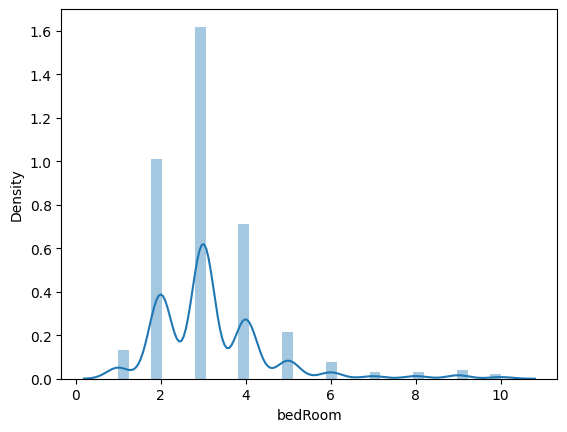

In [42]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

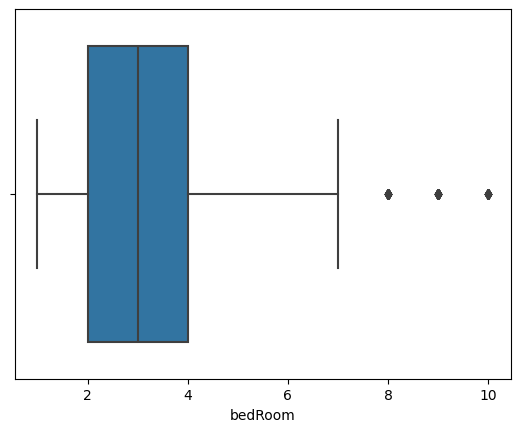

In [43]:
sns.boxplot(x=df['bedRoom'])

In [44]:
df['bedRoom'].describe()

count    3581.000000
mean        3.195476
std         1.376901
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

# Bathrooms

/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_65830/2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])
/Users/ravina/Desktop/RealEstateProject/realestatevenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bathroom', ylabel='Density'>

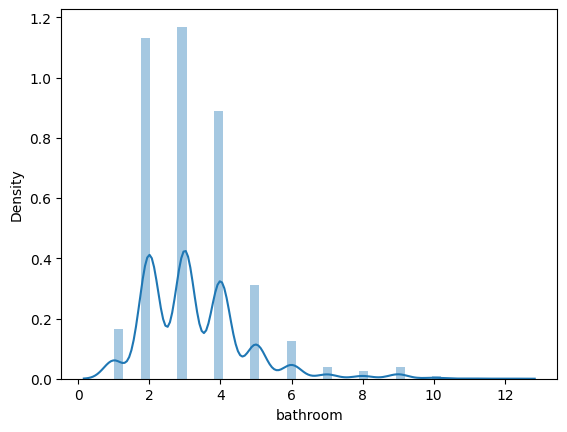

In [45]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

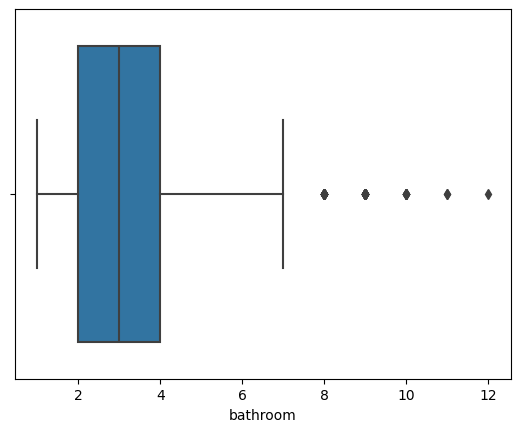

In [46]:
sns.boxplot(x=df['bathroom'])

In [47]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2605,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9.0,12.0,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0.0,1.0,0.0,0.0,0.0,0,146
2710,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10.0,11.0,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0.0,0.0,0.0,1.0,0.0,2,38
3238,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8.0,11.0,3+,3.0,East,Old Property,NaN,5000.0,NaN,1.0,1.0,0.0,1.0,1.0,0,39


# SuperBuildUpArea

/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_65830/4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])
/Users/ravina/Desktop/RealEstateProject/realestatevenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='super_built_up_area', ylabel='Density'>

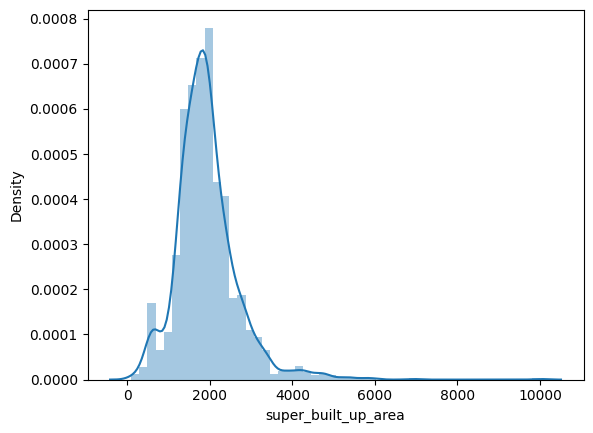

In [48]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

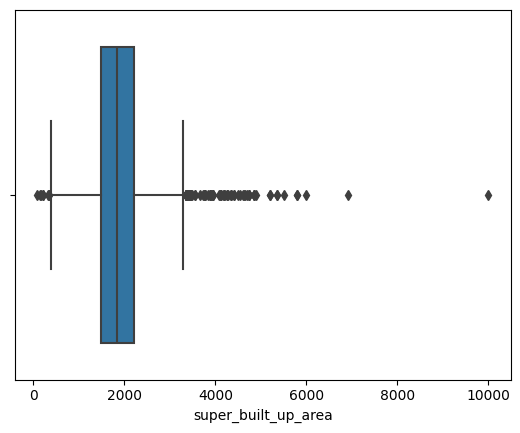

In [49]:
sns.boxplot(x=df['super_built_up_area'])

In [50]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [51]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
502,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.024167,Super Built up area 6926(643.45 sq.m.),4.0,4.0,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0,140
2341,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.000000,Super Built up area 10000(929.03 sq.m.),5.0,6.0,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0.0,1.0,0.0,1.0,1.0,1,49


#probably thses are not outliers but some of the big flats or villas

# BuildUpArea

/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_65830/3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])
/Users/ravina/Desktop/RealEstateProject/realestatevenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='built_up_area', ylabel='Density'>

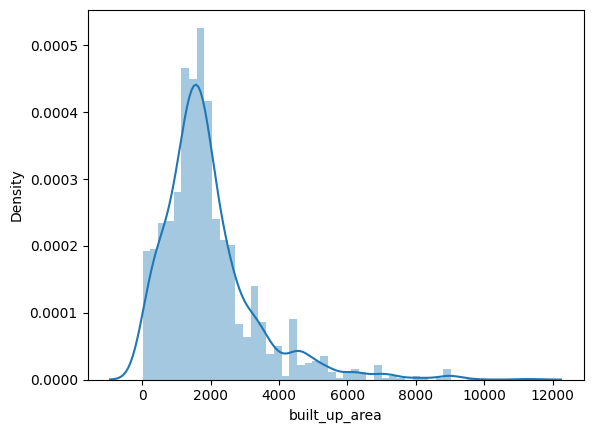

In [52]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

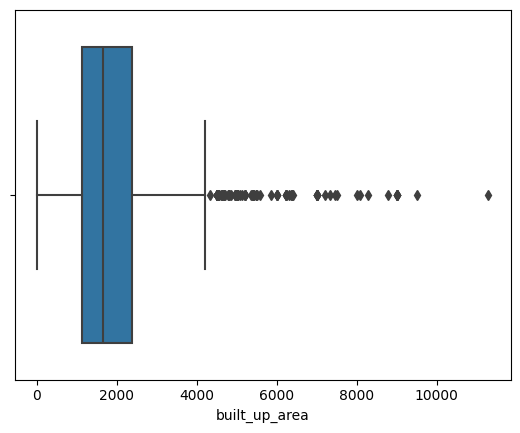

In [53]:
sns.boxplot(x=df['built_up_area'])

In [54]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
918,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1.0,1.0,0.0,1.0,1.0,0,42


# CarepetArea

/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_65830/3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])
/Users/ravina/Desktop/RealEstateProject/realestatevenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='carpet_area', ylabel='Density'>

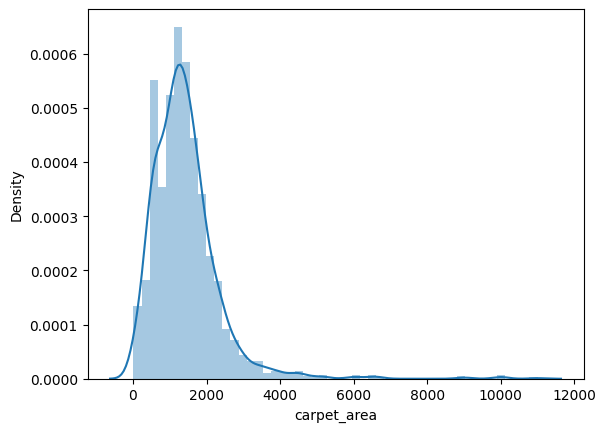

In [55]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

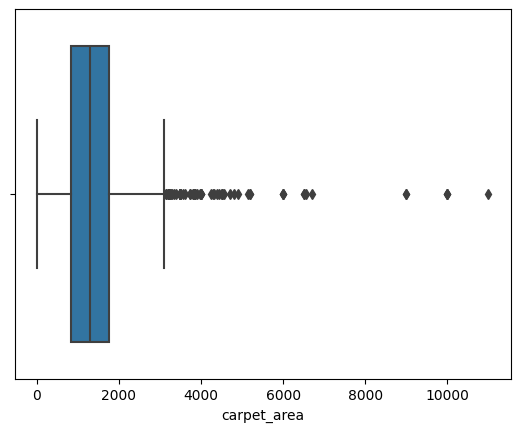

In [56]:
sns.boxplot(x=df['carpet_area'])

In [57]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
25,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0.0,1.0,0.0,0.0,0.0,1,60


/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_65830/3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])
/Users/ravina/Desktop/RealEstateProject/realestatevenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='luxury_score', ylabel='Density'>

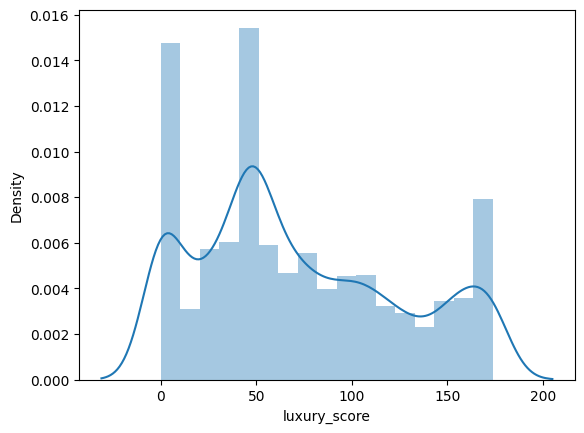

In [58]:
sns.distplot(df['luxury_score'])

<Axes: >

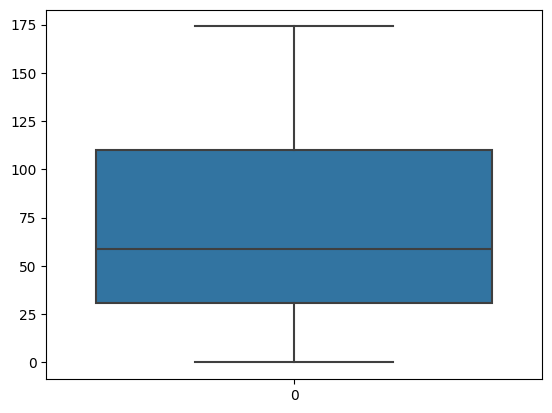

In [59]:
sns.boxplot(df['luxury_score'])

In [60]:
df.shape

(3581, 23)

In [61]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [62]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ss the leaf,sector 85,1.20,12371.0,970.010508,Super Built up area 1671(155.24 sq.m.)Built Up...,2.0,2.0,2,4.0,East,Relatively New,1671.0,1190.0,970.0,0.0,1.0,1.0,0.0,0.0,1,81
1,flat,tulip purple,sector 69,1.80,9000.0,2000.000000,Super Built up area 2400(222.97 sq.m.)Built Up...,4.0,5.0,3+,4.0,North-East,Relatively New,2400.0,2200.0,2000.0,0.0,1.0,0.0,0.0,0.0,1,165
2,flat,umang monsoon breeze,sector 78,1.15,5284.0,2176.381529,Super Built up area 2176(202.16 sq.m.),3.0,3.0,3,9.0,NaN,Moderately Old,2176.0,NaN,NaN,0.0,1.0,0.0,0.0,1.0,1,22
3,house,independent,sector 7,2.25,16892.0,1332.000000,Built Up area: 148 (123.75 sq.m.),5.0,3.0,0,2.0,NaN,Undefined,NaN,148.0,NaN,0.0,0.0,0.0,0.0,0.0,1,0
4,flat,tulip violet,sector 69,1.75,9459.0,1850.089862,Carpet area: 1850 (171.87 sq.m.),3.0,4.0,2,0.0,East,Relatively New,NaN,NaN,1850.0,0.0,0.0,0.0,0.0,0.0,0,174


/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_65830/2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])
/Users/ravina/Desktop/RealEstateProject/realestatevenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_per_sqft', ylabel='Density'>

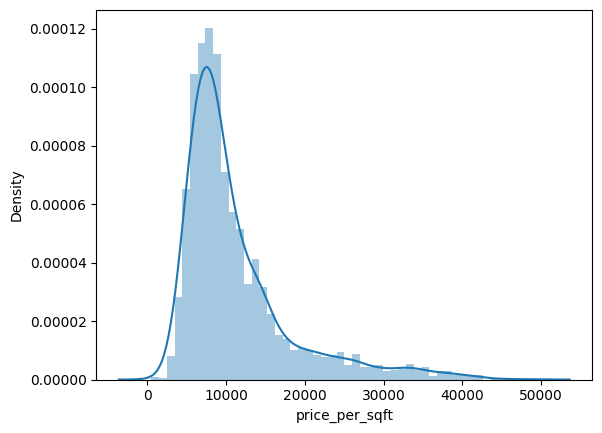

In [63]:
sns.distplot(df['price_per_sqft'])

<Axes: >

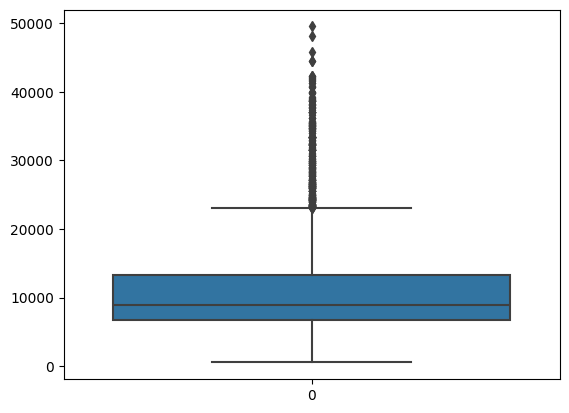

In [64]:
sns.boxplot(df['price_per_sqft'])

In [65]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
327,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6.0,8.0,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1.0,1.0,1.0,1.0,0.0,0,103
509,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0.0,1.0,0.0,1.0,0.0,2,97
1023,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2.0,2.0,2,3.0,North,Undefined,NaN,2000.0,1800.0,0.0,0.0,0.0,0.0,0.0,1,0
1985,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4.0,5.0,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0.0,1.0,1.0,1.0,0.0,0,60
2006,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6.0,8.0,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1.0,1.0,1.0,1.0,0.0,2,0
2146,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3.0,3.0,3+,4.0,North,New Property,NaN,2700.0,NaN,0.0,0.0,0.0,1.0,0.0,0,7
2773,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5.0,5.0,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0.0,1.0,0.0,1.0,0.0,0,88
3202,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6.0,6.0,3,2.0,East,Relatively New,NaN,4518.0,NaN,1.0,1.0,0.0,0.0,0.0,0,121
3634,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9.0,9.0,3+,5.0,East,New Property,NaN,115.0,100.0,0.0,0.0,0.0,0.0,1.0,0,44


In [66]:
#find the ratio of 'area' to 'bedroom' size to find some unexpected outliers. Let's take only bottom 5% values from there. 
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

251.92498275695667

In [67]:
df[(df['area']/df['bedRoom'])<251.1].sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1576,house,independent,sector 45,4.49,24455.0,1836.000000,Plot area 204(170.57 sq.m.),9.0,9.0,3+,3.0,North-West,Moderately Old,NaN,1836.0,NaN,0.0,0.0,0.0,0.0,1.0,0,90
3779,house,independent,sector 4,0.47,10609.0,443.000000,Plot area 49(40.97 sq.m.)Built Up area: 50 sq....,2.0,2.0,1,2.0,East,New Property,NaN,50.0,48.00,1.0,0.0,0.0,0.0,0.0,0,73
3219,flat,gls arawali homes,sohna road,0.30,6243.0,480.538203,Super Built up area 567(52.68 sq.m.)Carpet are...,2.0,2.0,2,4.0,East,Relatively New,567.0,NaN,480.53,0.0,0.0,0.0,0.0,0.0,2,120
2854,flat,signature global solera,sector 107,0.30,6134.0,489.077274,Super Built up area 602(55.93 sq.m.)Carpet are...,2.0,2.0,1,5.0,East,Relatively New,602.0,NaN,489.00,0.0,0.0,0.0,0.0,0.0,1,57
95,house,independent,sector 4,1.10,6111.0,1800.000000,Plot area 200(167.23 sq.m.),8.0,4.0,3+,2.0,West,Old Property,NaN,1800.0,NaN,0.0,0.0,0.0,0.0,0.0,1,7


In [68]:
df[(df['area']/df['bedRoom'])<251].sort_values(by='area',ascending=True).head(5)
# from here it is clear that it is quite unusual to have 2 rooms in 145 squarefeet.
#so there is a posibility that these property are niether house nor flat but place ground or plots where these number of rooms can be build up in multi stories.

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2163,house,independent,sector 17,0.32,22069.0,145.0,Built Up area: 145 (13.47 sq.m.),2.0,2.0,0,3.0,NaN,Undefined,NaN,145.0,NaN,0.0,0.0,0.0,0.0,0.0,1,0
2808,house,independent,sector 7,0.27,12000.0,225.0,Plot area 225(20.9 sq.m.),2.0,2.0,1,2.0,North-East,Moderately Old,NaN,225.0,NaN,0.0,0.0,0.0,0.0,0.0,1,12
3673,flat,ansal api sushant estate,sector 52,0.29,11600.0,250.0,Carpet area: 250 (23.23 sq.m.),1.0,1.0,0,0.0,NaN,Moderately Old,NaN,NaN,250.0,0.0,0.0,0.0,0.0,0.0,0,49
3292,house,my home,new sector 2,0.34,12593.0,270.0,Plot area 270(25.08 sq.m.),2.0,2.0,2,3.0,West,Moderately Old,NaN,270.0,NaN,0.0,0.0,0.0,0.0,0.0,1,22
1879,house,independent,sector 9,0.22,7407.0,297.0,Carpet area: 33 (27.59 sq.m.),2.0,2.0,2,1.0,NaN,Undefined,NaN,NaN,33.0,0.0,0.0,0.0,0.0,0.0,1,0


# we will remove the plot type area as mentioned in the above cell.

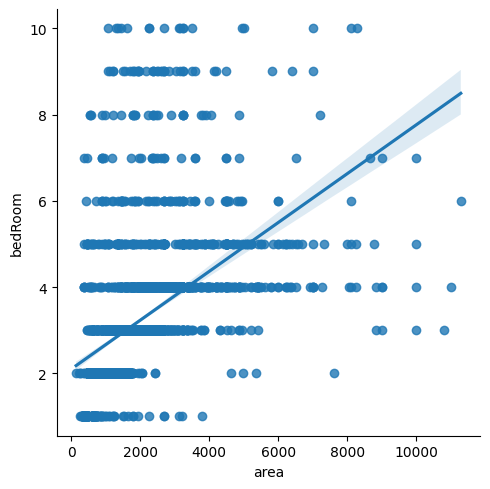

In [69]:
sns.lmplot(data=df,x='area',y='bedRoom')

# Observation:
1.  It is reasonable if the area increases rooms will also increase, but if area decreases rooms can't increase. 
2. we need to remove these extreme points from the dataframe.

In [70]:
df['area_to_room_ratio']=df['area']/df['bedRoom']

In [71]:
df[df['area_to_room_ratio']<250]['bedRoom'].value_counts()

bedRoom
2.0     47
3.0     33
5.0     28
6.0     17
4.0     17
9.0     15
8.0     12
7.0      8
10.0     7
Name: count, dtype: int64

In [72]:
df=df[df['area_to_room_ratio']>100]

In [73]:
outliers_df=df[(df['area_to_room_ratio']<250) & (df['bedRoom']>3)]

In [74]:
#following trransformation will divide the number of bedrooms over the floors. 
outliers_df['bedRoom']=round(outliers_df['bedRoom']/outliers_df['floorNum'])

/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_65830/365717274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom']=round(outliers_df['bedRoom']/outliers_df['floorNum'])


In [75]:
df.update(outliers_df)

In [76]:
df['area_to_room_ratio']=df['area']/df['bedRoom']

In [77]:
df[(df['area_to_room_ratio']<250) & (df['bedRoom']>4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_to_room_ratio
529,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9.0,4.0,3,1.0,South,Undefined,NaN,NaN,120.0,0.0,0.0,0.0,0.0,0.0,1,0,120.000000
681,house,"bhim nagar, sector 6",sector 6,0.85,14096.0,603.0,Plot area 67(6.22 sq.m.),5.0,2.0,2,1.0,NaN,Old Property,NaN,67.0,NaN,0.0,0.0,0.0,1.0,0.0,1,29,120.600000
1359,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5.0,1.0,0,1.0,NaN,Undefined,NaN,565.0,NaN,0.0,0.0,0.0,0.0,0.0,1,0,113.000000
1395,house,independent,manesar,1.10,6173.0,1782.0,Plot area 1782(165.55 sq.m.),8.0,8.0,0,1.0,NaN,New Property,NaN,1782.0,NaN,0.0,0.0,0.0,0.0,0.0,1,0,222.750000
1414,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5.0,4.0,2,1.0,North-East,Undefined,NaN,NaN,110.0,0.0,0.0,0.0,0.0,0.0,1,0,198.000000
1500,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10.0,7.0,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1.0,1.0,0.0,1.0,1.0,0,0,225.000000
1579,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6.0,4.0,1,1.0,South-West,Undefined,NaN,NaN,900.0,0.0,0.0,0.0,0.0,0.0,1,0,150.000000
1704,house,independent,sector 3 phase 2,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5.0,4.0,2,1.0,East,Undefined,NaN,1100.0,900.0,0.0,0.0,0.0,0.0,0.0,1,0,220.000000
1860,house,independent,sector 3 phase 2,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5.0,3.0,3,1.0,NaN,Undefined,NaN,NaN,900.0,0.0,0.0,0.0,0.0,0.0,1,0,180.000000
2604,house,independent,sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10.0,1.0,0,1.0,NaN,New Property,NaN,2250.0,NaN,0.0,0.0,0.0,0.0,0.0,1,0,225.000000


In [78]:
df[(df['area_to_room_ratio']<250) & (df['bedRoom']>4)].shape

(13, 24)

In [79]:
df.shape

(3561, 24)

In [80]:
df=df[~((df['area_to_room_ratio']<250) & (df['bedRoom']>4))]

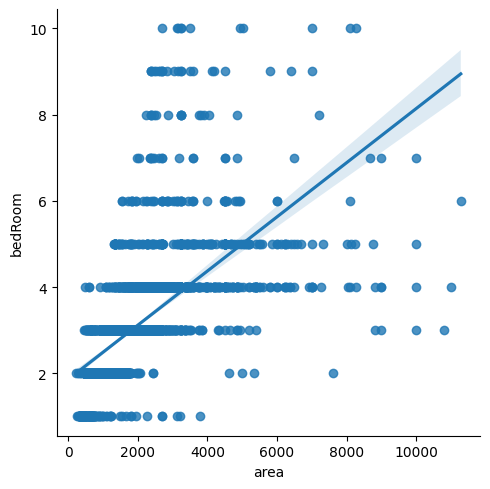

In [81]:
sns.lmplot(data=df,x='area',y='bedRoom')

# Observation:
1. after transformation some of the points were removed.
2. Now we will work over this file onwards.

In [82]:
df.to_csv('gurgaon_outliers_treated.csv',index=False)

# Missing Value Identification and Imputation

In [83]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1009
agePossession             0
super_built_up_area    1673
built_up_area          1965
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_to_room_ratio        0
dtype: int64

# Tasks to perform:
1. we will impute built up area with help of area column, super_built_up_area and carprt_area.
2. there is one missing value to inpute in society column
3. agepossession have some undefined values which we need to impute. 


<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

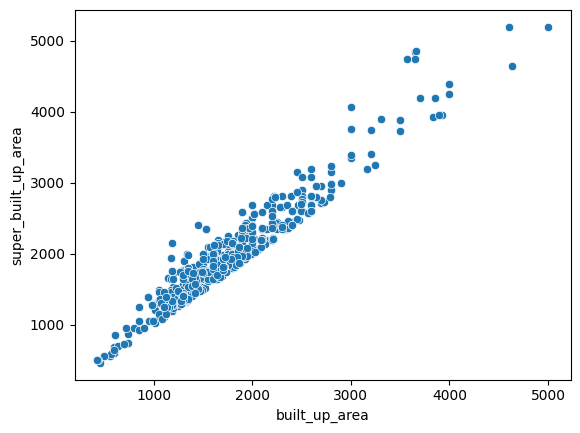

In [84]:
sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area'])

there is strong relationship between built_up_area and super_built_up_area

In [85]:
df.shape

(3548, 24)

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

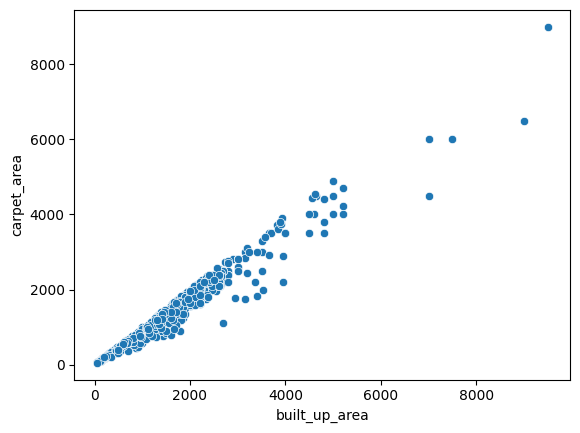

In [86]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'])

In [87]:
# check if there is any missing values in built_up_area, super_built_up_area, carpet_area

((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())).shape

(3548,)

In [88]:
all_present_df=df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [89]:
all_present_df.head(3)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_to_room_ratio
0,flat,ss the leaf,sector 85,1.20,12371.0,970.010508,Super Built up area 1671(155.24 sq.m.)Built Up...,2.0,2.0,2,4.0,East,Relatively New,1671.0,1190.0,970.0,0.0,1.0,1.0,0.0,0.0,1,81,485.005254
1,flat,tulip purple,sector 69,1.80,9000.0,2000.000000,Super Built up area 2400(222.97 sq.m.)Built Up...,4.0,5.0,3+,4.0,North-East,Relatively New,2400.0,2200.0,2000.0,0.0,1.0,0.0,0.0,0.0,1,165,500.000000
16,flat,m3m skywalk,sector 74,1.52,13342.0,1139.259481,Super Built up area 1400(130.06 sq.m.)Built Up...,2.0,2.0,3,6.0,South-East,Relatively New,1400.0,1250.0,1139.2,0.0,0.0,1.0,0.0,0.0,1,174,569.629741


In [90]:
all_present_df.shape

(531, 24)

In [91]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [92]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [93]:
print(super_to_built_up_ratio, ",", carpet_to_built_up_ratio)

1.105263157894737 , 0.9


In [94]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [95]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_to_room_ratio
8,flat,laxmi apartment sector 99a gurgaon,sector 99a,0.30,4615.0,650.054171,Super Built up area 650(60.39 sq.m.)Carpet are...,2.0,2.0,1,4.0,NaN,New Property,650.0,NaN,550.0,0.0,0.0,0.0,0.0,0.0,1,44,325.027086
11,flat,ss the leaf,sector 85,1.20,7317.0,1640.016400,Super Built up area 1640(152.36 sq.m.)Carpet a...,2.0,2.0,3+,14.0,East,Relatively New,1640.0,NaN,1148.0,0.0,0.0,1.0,0.0,0.0,1,141,820.008200
12,flat,suncity platinum towers,sector 28,7.00,22222.0,3150.031500,Super Built up area 3150(292.64 sq.m.)Carpet a...,4.0,3.0,2,10.0,North,Moderately Old,3150.0,NaN,1913.0,0.0,1.0,0.0,0.0,0.0,1,31,787.507875
20,flat,suncity avenue,sector 102,0.47,8928.0,526.433692,Super Built up area 632(58.71 sq.m.)Carpet are...,2.0,2.0,1,5.0,South-East,Relatively New,632.0,NaN,532.0,0.0,0.0,1.0,0.0,0.0,1,142,263.216846
23,flat,godrej nature plus,sector 33,1.40,15124.0,925.681037,Super Built up area 145Carpet area: 86 sq.m.,3.0,2.0,3+,20.0,NaN,New Property,145.0,NaN,86.0,0.0,0.0,0.0,0.0,0.0,1,70,308.560346


In [96]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_65830/1215074969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_65830/1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [97]:
df.update(sbc_df)

In [98]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1009
agePossession             0
super_built_up_area    1673
built_up_area          1544
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_to_room_ratio        0
dtype: int64

In [99]:
# super_built_up present carpet is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [100]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_to_room_ratio
2,flat,umang monsoon breeze,sector 78,1.15,5284.0,2176.381529,Super Built up area 2176(202.16 sq.m.),3.0,3.0,3,9.0,NaN,Moderately Old,2176.0,NaN,NaN,0.0,1.0,0.0,0.0,1.0,1,22,725.460510
6,flat,bestech park view residency,sector 2,1.02,7208.0,1415.094340,Super Built up area 1415(131.46 sq.m.),2.0,2.0,3,11.0,South-West,Moderately Old,1415.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1,92,707.547170
10,flat,ats tourmaline,sector 109,1.75,8139.0,2150.141295,Super Built up area 2150(199.74 sq.m.),3.0,4.0,3+,2.0,North,Relatively New,2150.0,NaN,NaN,0.0,1.0,0.0,0.0,1.0,1,65,716.713765
15,flat,hsiidc sidco aravali,manesar,0.90,3648.0,2467.105263,Super Built up area 2467(229.19 sq.m.),4.0,4.0,3,7.0,NaN,Moderately Old,2467.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1,0,616.776316
27,flat,bestech park view spa next,sector 67,2.35,12144.0,1935.111989,Super Built up area 1935(179.77 sq.m.),3.0,4.0,3+,14.0,South-West,Moderately Old,1935.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0,156,645.037330


In [101]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_65830/1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_65830/1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_

In [102]:
df.update(sb_df)

In [103]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1009
agePossession             0
super_built_up_area    1673
built_up_area           669
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_to_room_ratio        0
dtype: int64

In [104]:
# super_built_up null carpet is present built_up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [105]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_to_room_ratio
4,flat,tulip violet,sector 69,1.75,9459.0,1850.089862,Carpet area: 1850 (171.87 sq.m.),3.0,4.0,2,0.0,East,Relatively New,NaN,NaN,1850.000000,0.0,0.0,0.0,0.0,0.0,0,174,616.696621
5,flat,shri ram apartments,sector 4,0.46,5111.0,900.019566,Carpet area: 900 (83.61 sq.m.),2.0,2.0,1,1.0,East,Relatively New,NaN,NaN,900.000000,0.0,0.0,0.0,0.0,0.0,0,69,450.009783
7,flat,pyramid elite,sector 86,0.45,7739.0,581.470474,Carpet area: 581.41 (54.01 sq.m.),2.0,2.0,1,4.0,NaN,Under Construction,NaN,NaN,581.358239,0.0,0.0,0.0,0.0,0.0,1,66,290.735237
9,flat,vatika city,sector 49,1.72,7818.0,2200.051164,Carpet area: 2200 (204.39 sq.m.),3.0,3.0,2,2.0,North-East,Old Property,NaN,NaN,2200.000000,0.0,0.0,0.0,0.0,0.0,0,144,733.350388
21,flat,ireo victory valley,sector 67,3.49,13000.0,2684.615385,Carpet area: 2452 (227.8 sq.m.),3.0,3.0,3,19.0,South-East,Relatively New,NaN,NaN,2452.000000,0.0,1.0,0.0,0.0,0.0,1,103,894.871795


In [106]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_65830/2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_65830/2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_

In [107]:
df.update(c_df)

In [108]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1009
agePossession             0
super_built_up_area    1673
built_up_area             0
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_to_room_ratio        0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

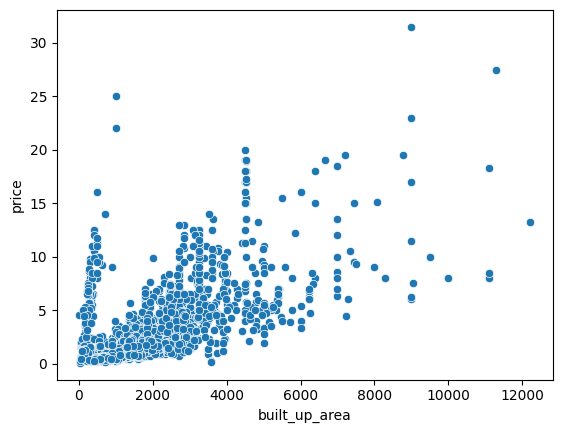

In [109]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

#there are some anamolies as the built up area<1000 but price were quite high, we need to find out these points and we need to handle these points.

In [110]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [111]:
anamoly_df.sample(5)

,price,area,built_up_area
3741,4.50,1845.000000,206.0
3258,4.86,1875.000000,1697.0
3323,2.70,2576.090068,1891.0
672,4.25,1620.000000,1620.0
3667,3.35,2034.001214,1841.0


In [112]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [113]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

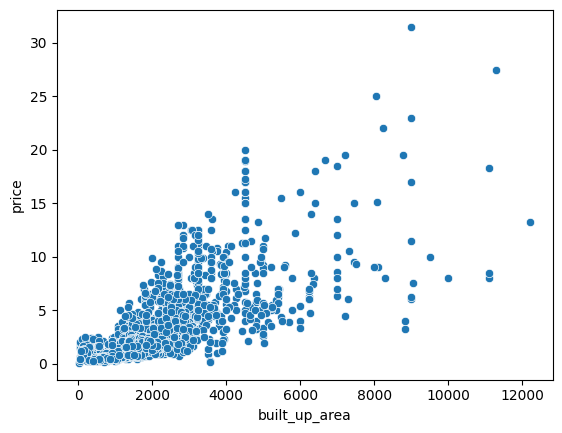

In [114]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])
# now it looks good

In [115]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_to_room_ratio'],inplace=True)

In [116]:
df.head(3)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ss the leaf,sector 85,1.20,12371.0,2.0,2.0,2,4.0,East,Relatively New,1190.0,0.0,1.0,1.0,0.0,0.0,1,81
1,flat,tulip purple,sector 69,1.80,9000.0,4.0,5.0,3+,4.0,North-East,Relatively New,2200.0,0.0,1.0,0.0,0.0,0.0,1,165
2,flat,umang monsoon breeze,sector 78,1.15,5284.0,3.0,3.0,3,9.0,NaN,Moderately Old,1969.0,0.0,1.0,0.0,0.0,1.0,1,22


In [117]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1009
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

# Handeling the missing values in floor_Num

In [118]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
53,house,jacob pura,sector 12,0.35,9722.0,2.0,1.0,0,NaN,NaN,Old Property,360.0,0.0,0.0,0.0,0.0,0.0,1,0
219,house,independent,sector 4,0.65,11111.0,4.0,2.0,2,NaN,NaN,Moderately Old,585.0,0.0,0.0,0.0,0.0,0.0,1,0
383,house,independent,sector 3,1.50,10288.0,3.0,3.0,0,NaN,NaN,Old Property,210.0,0.0,0.0,0.0,0.0,0.0,1,0
387,flat,experion heartsong,dwarka expressway,1.08,6150.0,3.0,3.0,0,NaN,NaN,Under Construction,1758.0,0.0,0.0,0.0,0.0,0.0,1,0
535,house,independent,sector 24,1.45,2984.0,3.0,3.0,1,NaN,NaN,Old Property,540.0,0.0,0.0,0.0,0.0,0.0,1,9
880,house,ansal sushant lok,sector 43,10.50,27911.0,4.0,4.0,2,NaN,North-East,Old Property,3762.0,0.0,1.0,0.0,0.0,0.0,1,59
967,house,independent,sector 26,4.60,12198.0,4.0,4.0,3+,NaN,NaN,Old Property,3771.0,0.0,0.0,0.0,0.0,0.0,1,28
1139,house,independent,sector 4,4.12,8889.0,2.0,1.0,3+,NaN,NaN,Moderately Old,4635.0,0.0,0.0,0.0,0.0,0.0,1,0
1873,house,independent,sector 7,6.50,15046.0,3.0,2.0,3+,NaN,NaN,Old Property,4320.0,0.0,0.0,0.0,0.0,0.0,1,9
2006,house,independent,sector 25,13.00,45710.0,6.0,8.0,3+,NaN,NaN,Relatively New,2844.0,1.0,1.0,1.0,1.0,0.0,2,0


# What is observed and to do.
1. maximum number of the missing floor values are coming from house datasets and there are only two flats with missing floors. 
2. fill the missing flooer values with the median of the house floors.

In [119]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [120]:
df['floorNum'].fillna(2.0,inplace=True)

/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_65830/15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [121]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1009
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

#  Missing values in Facing column


<Axes: ylabel='count'>

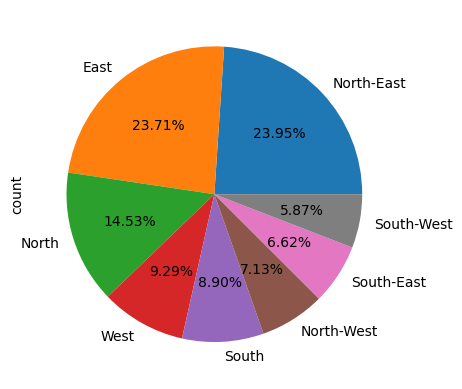

In [122]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [123]:
print("We need to handle {}% missing values in Facing column, keeping the given distribution intact.".format(round(1009/df.shape[0],2)))

We need to handle 0.28% missing values in Facing column, keeping the given distribution intact.


In [124]:
#for time bieng i am droping this column
df.drop(columns=['facing'],inplace=True)

In [125]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3255,house,greenopolis,sector 89,0.70,5397.0,2.0,2.0,2,14.0,Undefined,1297.0,0.0,0.0,0.0,0.0,0.0,1,0
2560,house,unitech espace,sector 50,7.50,34722.0,3.0,3.0,2,2.0,Moderately Old,2160.0,0.0,1.0,0.0,0.0,0.0,0,66
802,flat,shree vardhman flora,sector 90,0.70,5325.0,2.0,2.0,3,9.0,New Property,1350.0,1.0,0.0,0.0,0.0,0.0,1,60
713,house,bptp visionnaire,sector 70a,4.00,6666.0,4.0,4.0,3+,2.0,Relatively New,6000.0,0.0,1.0,0.0,0.0,0.0,1,154
3657,flat,bptp astaire gardens,sector 70a,0.97,6587.0,3.0,3.0,3+,1.0,Relatively New,1339.0,0.0,0.0,0.0,0.0,1.0,1,149


In [126]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [127]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2281,flat,NaN,sector 78,0.6,3692.0,2.0,2.0,0,2.0,Under Construction,1625.0,0.0,0.0,0.0,0.0,0.0,1,0


We can impute this value with the estimated society name using sector column but this is only a single row, let's drop it.

In [128]:
df.drop(index=2281,inplace=True)

In [129]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

# We need to treat the age_possesion column also to fill the undefined values.

In [130]:
df['agePossession'].value_counts()

agePossession
Relatively New        1604
New Property           555
Moderately Old         543
Old Property           292
Undefined              291
Under Construction     262
Name: count, dtype: int64

Need to find 291 undefined values for the age possession column.
1. we can interpret these values using colums property_type,society and sector.

In [132]:
df[df['agePossession'] == 'Undefined'].head(3)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3,house,independent,sector 7,2.25,16892.0,5.0,3.0,0,2.0,Undefined,148.0,0.0,0.0,0.0,0.0,0.0,1,0
51,flat,godrej nature plus,sector 33,1.25,9025.0,2.0,2.0,3,17.0,Undefined,1385.0,0.0,0.0,0.0,0.0,0.0,1,56
57,flat,ramsons kshitij,sector 95,0.40,5839.0,3.0,2.0,2,6.0,Undefined,761.0,0.0,0.0,0.0,0.0,0.0,1,0


In [133]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [134]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [135]:
df['agePossession'].value_counts()

agePossession
Relatively New        1715
New Property           595
Moderately Old         581
Old Property           326
Under Construction     277
Undefined               53
Name: count, dtype: int64

Still there are 53 undefined values. will handel theses using sector information only. 

In [136]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [137]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [138]:
df['agePossession'].value_counts()

agePossession
Relatively New        1724
New Property           596
Moderately Old         588
Old Property           329
Under Construction     277
Undefined               33
Name: count, dtype: int64

In [139]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [140]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [141]:
df['agePossession'].value_counts()

agePossession
Relatively New        1726
Moderately Old         619
New Property           596
Old Property           329
Under Construction     277
Name: count, dtype: int64

There are no Undefined AgePossession

In [142]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [143]:
df.to_csv('properties_OutlierTreatment_missing_value_imputation.csv',index=False)